In [34]:
import os
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [35]:
root = "../dataset/roadpoles_v1"

# Image Path
test_image = "../dataset/roadpoles_v1/train/images/frame_000010.PNG"
test_label = "../dataset/roadpoles_v1/train/labels/frame_000010.txt"

dataset_splits = ["train", "valid"]

In [36]:
def get_poles(pole_files):
    poles = []

    with open(pole_files, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 5:
                cls, x, y, w, h = map(float, parts)
                poles.append((x, y, w, h))
    return poles

In [37]:
"""
basic data analysis, how many poles per image,
how many poles on average,
images for each file,
the location of the poles, and such
"""

def get_pole_stats(dataset_split):
    img_dir = os.path.join(root, dataset_split, "images")
    lab_dir = os.path.join(root, dataset_split, "labels")

    img_files = [f for f in os.listdir(img_dir)]
    pole_files = [f for f in os.listdir(lab_dir)]

    tot_img_file = len(img_files)
    tot_pole_file = len(pole_files)
    tot_poles = 0
    sum_x, sum_y = 0.0, 0.0

    for pole in pole_files:
        path = os.path.join(lab_dir, pole)
        poles = get_poles(path)
        tot_poles += len(poles)

        for x, y,_,_ in poles:
            sum_x += x
            sum_y += y

    avg_poles = tot_poles / tot_pole_file
    avg_x = sum_x / tot_poles
    avg_y = sum_y / tot_poles

    return tot_img_file, tot_pole_file, tot_poles, avg_poles, avg_x, avg_y

In [38]:
"""
method for rescaling the pole coordinates to pixelcoordinated based in image shape
i can then get the exact pixle values of where to crop an image
i then also need to rescale it back and find th min and amx of each bounding box
"""


def get_pole_min_max_pixel(dataset_split, width=1920, height=1208):
    lab_dir = os.path.join(root, dataset_split, "labels")
    pole_files = [f for f in os.listdir(lab_dir)]

    min_x = math.inf
    max_x = -math.inf
    min_y = math.inf
    max_y = -math.inf

    for pole in pole_files:
        path = os.path.join(lab_dir, pole)
        poles = get_poles(path)
        for x_norm, y_norm, w_norm, h_norm in poles:
            x_pix = x_norm * width
            y_pix = y_norm * height
            w_pix = w_norm * width
            h_pix = h_norm * height
            x1 = x_pix - w_pix / 2
            x2 = x_pix + w_pix / 2
            y1 = y_pix - h_pix / 2
            y2 = y_pix + h_pix / 2
            min_x = min(min_x, x1)
            max_x = max(max_x, x2)
            min_y = min(min_y, y1)
            max_y = max(max_y, y2)

    return int(min_x), int(max_x), int(min_y), int(max_y)

In [39]:
train, valid, test = 0, 0, 0
test_path = os.path.join(root, "test", "images")

test = len([f for f in os.listdir(test_path)])

print("---------- Data Statistics ----------")
for split in dataset_splits:

    tot_img_file, tot_pole_file, tot_poles, avg_poles, avg_x, avg_y = get_pole_stats(split)
    print("same amount of image as labels ?: " + str(tot_img_file == tot_pole_file))
    if split == "train":
        train = tot_img_file
    else:
        valid = tot_img_file
    print("avg pole per image: " + str(round(avg_poles, 2)))
    print("avg pole position: (" + str(round(avg_x, 2)) + ", " + str(round(avg_y, 2)) + ")")
    print("")

total_images = train + valid + test


print("Amount of train images: " + str(train))
print("Amount of valid images: " + str(valid))
print("Amount of test images: " + str(test))

print("train, test, validate split: " + str(train/total_images))


---------- Data Statistics ----------
same amount of image as labels ?: True
avg pole per image: 1.22
avg pole position: (0.46, 0.61)

same amount of image as labels ?: True
avg pole per image: 1.23
avg pole position: (0.46, 0.61)

Amount of train images: 322
Amount of valid images: 92
Amount of test images: 46
train, test, validate split: 0.7


In [40]:
print("--------- Crop Analysis ----------")
for split in ["train", "valid"]:
    min_x, max_x, min_y, max_y = get_pole_min_max_pixel(split)
    print(f"{split}")
    print(f"  X: min {min_x}, max {max_x}")
    print(f"  Y: min {min_y}, max {max_y}\n")

--------- Crop Analysis ----------
train
  X: min 0, max 1906
  Y: min 543, max 1139

valid
  X: min 15, max 1913
  Y: min 574, max 1115



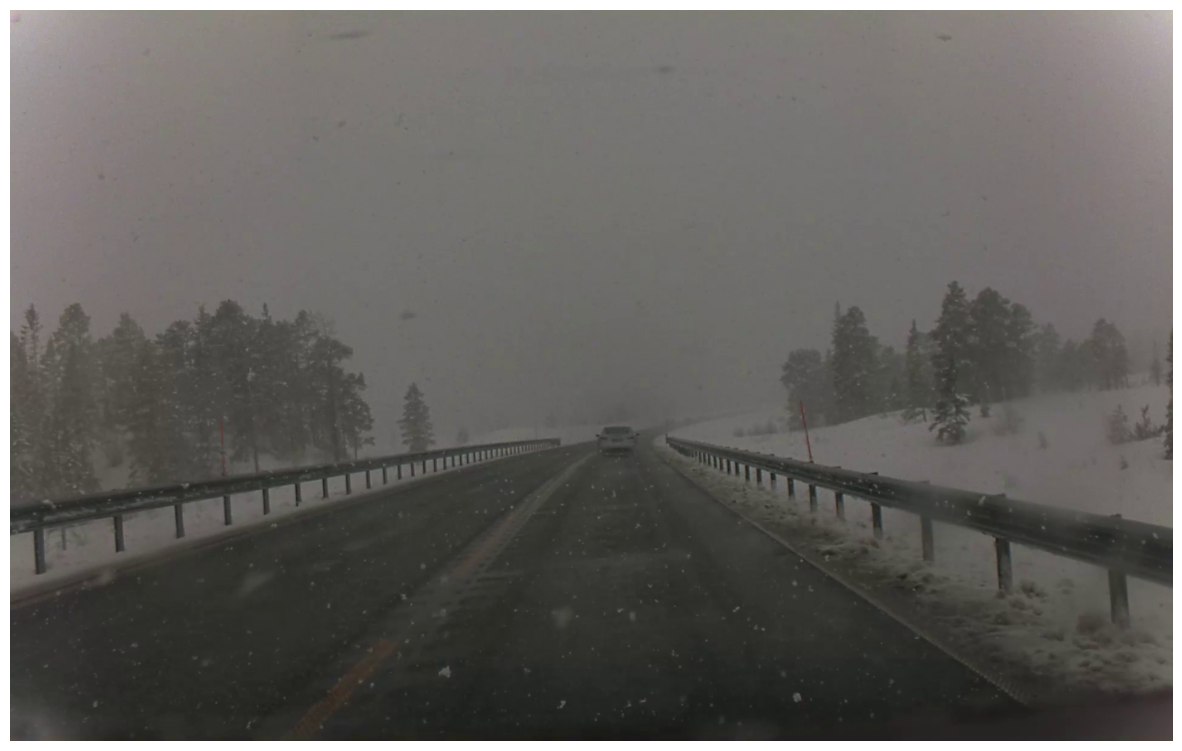

In [41]:
img = mpimg.imread(test_image)

plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')
plt.show()
